# Examples of feature extraction

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import immas
from immas import MammogramImage
from immas.basic_functions import show_image_plt

## Feature extraction using MammogramImage class

Let's read sample mammogram image first

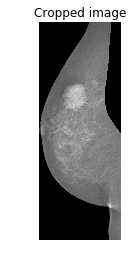

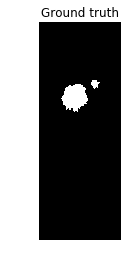

In [2]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

mm = MammogramImage(path_image, path_mask, ground_truth_path=path_ground_truth, pmuscle_mask_path=pectoral_muscle)

show_image_plt(mm.image_data,'Cropped image')
show_image_plt(mm.cropped_ground_truth,'Ground truth')

Now we can do features and contours extraction using `get_img_features` function, by default it selects 10 biggest (by area) false positive contours, and true positive contours (masses) if any available. We can seletct data for training and for testing using this function.

In [7]:
# training data
features_train, contours_train = mm.get_img_features()

# test data
features_test, contours_test = mm.get_img_features(train=False)

help(mm.get_img_features)

/home/okozyn/Projects/immas/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


Help on method get_img_features in module immas.io.mammogram:

get_img_features(contour_max_number=10, train=True) method of immas.io.mammogram.MammogramImage instance
    Finds mass candidates contours and their features.
    
    Args:
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
        train (bool): if True, dataframe of features will be returned with correct class
        ids assigned to each candidate region, if False all class ids will be zero. Default
        value is True.
    
    Returns:
        (pandas.DataFrame, [opencv.contour]): features of selected contours 
        and list of contours.



### Train data

Let's check what output we have. `class_id` field equals to 1 for true positive (masses) and -1 for false positive (not masses). Please pay attention that features are returned in `pandas.DataFrame` format.

In [8]:
features_train

,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
0,840.852812,15244.0,3.690890,4130.168616,32564.786239,19025.671417,1.0,6.898285e+10,-1.0
1,469.781744,7421.5,2.366414,3136.179958,32942.014517,18901.707121,1.0,2.153003e+09,-1.0
2,503.740114,5976.0,3.379034,1768.552550,32598.760810,19036.268850,1.0,4.850209e+10,-1.0
3,373.455844,4293.0,2.585281,1660.554455,33611.502122,18996.723723,1.0,-1.212079e+11,-1.0
4,362.284271,3810.0,2.741348,1389.827363,32656.269057,18669.309304,1.0,3.615419e+09,-1.0
5,310.041630,3402.5,2.248185,1513.443137,32419.812658,18924.156407,1.0,8.411224e+10,-1.0
6,295.698484,3319.5,2.096118,1583.642007,32924.413395,18998.025002,1.0,-1.288015e+11,-1.0
7,287.798990,3053.0,2.158946,1414.115697,32762.653834,18944.126990,1.0,1.256461e+11,-1.0
8,274.870057,2666.5,2.254776,1182.600817,33212.127454,19213.513195,1.0,-3.230391e+11,-1.0
9,267.798990,2604.0,2.191629,1188.157342,32850.051170,18623.262218,1.0,-1.448441e+11,-1.0


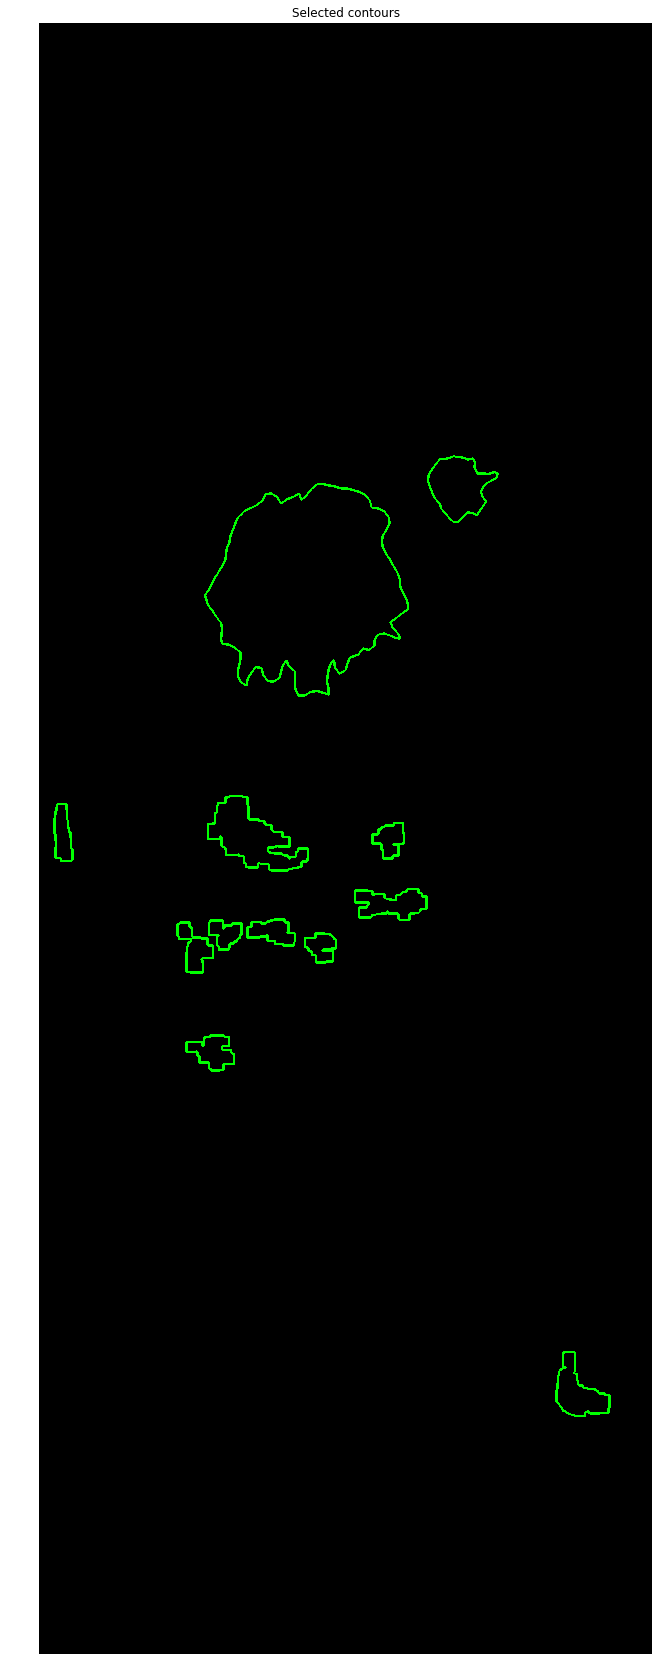

In [9]:
mm_shape = mm.image_data.shape

img_color = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color, contours_train, -1, (0,255,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color,'Selected contours')

### Test data

For this dataframe `class_id` field equals to 0 for both true positive (masses) and false positive (not masses) regions of interest. Please pay attention that features are returned in `pandas.DataFrame` format.

In [10]:
features_test

,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
0,1764.960458,99652.0,2.487563,40060.092060,32605.021502,18886.513883,1.0,1.697612e+10,0.0
1,840.852812,15244.0,3.690890,4130.168616,32564.786239,19025.671417,1.0,6.898285e+10,0.0
2,469.781744,7421.5,2.366414,3136.179958,32942.014517,18901.707121,1.0,2.153003e+09,0.0
3,503.740114,5976.0,3.379034,1768.552550,32598.760810,19036.268850,1.0,4.850209e+10,0.0
4,373.455844,4293.0,2.585281,1660.554455,33611.502122,18996.723723,1.0,-1.212079e+11,0.0
5,362.284271,3810.0,2.741348,1389.827363,32656.269057,18669.309304,1.0,3.615419e+09,0.0
6,310.041630,3402.5,2.248185,1513.443137,32419.812658,18924.156407,1.0,8.411224e+10,0.0
7,295.698484,3319.5,2.096118,1583.642007,32924.413395,18998.025002,1.0,-1.288015e+11,0.0
8,287.798990,3053.0,2.158946,1414.115697,32762.653834,18944.126990,1.0,1.256461e+11,0.0
9,271.698484,2798.5,2.099130,1333.171606,32675.187649,18763.082127,1.0,1.755368e+11,0.0


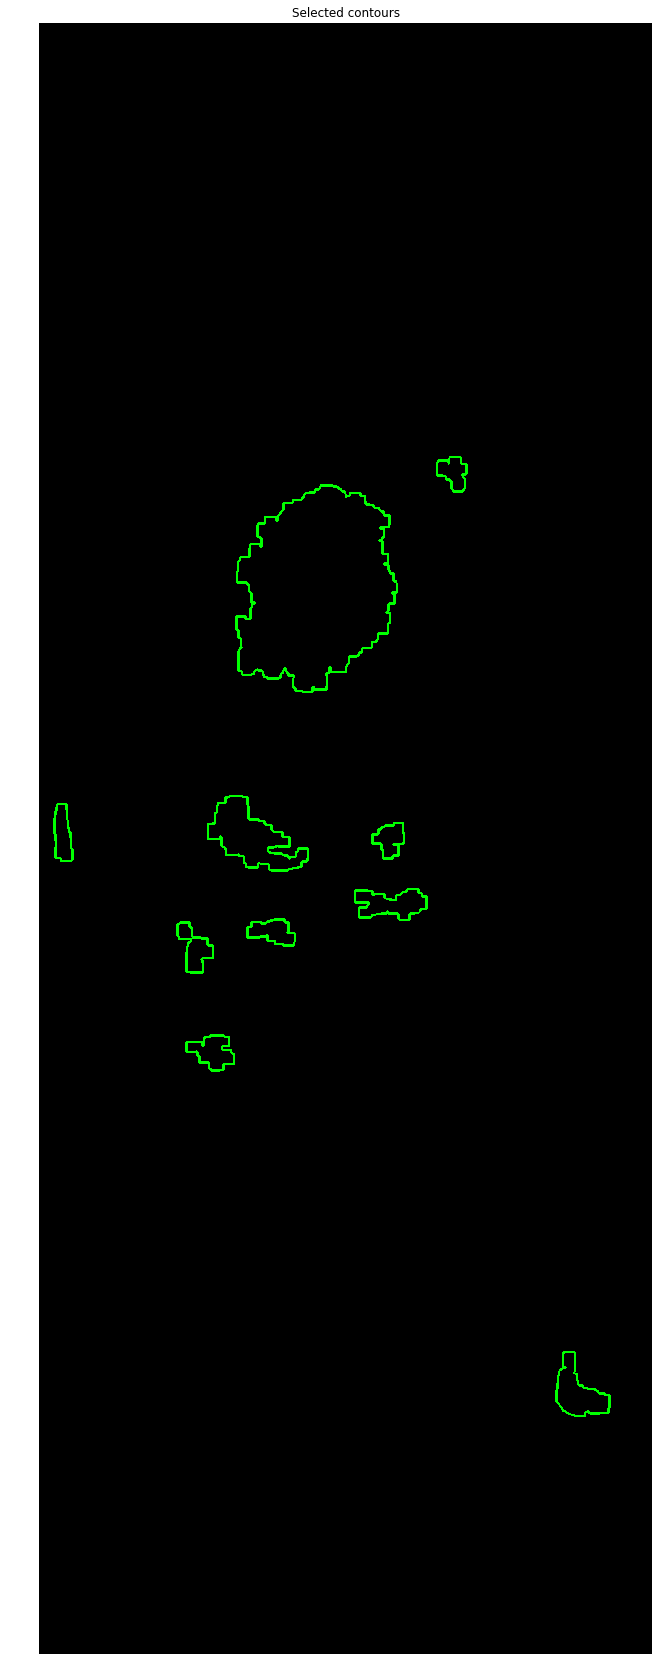

In [11]:
mm_shape = mm.image_data.shape

img_color = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color, contours_test, -1, (0,255,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color,'Selected contours')

## Feature extraction using get_img_features function

Features can be extracted from mammogram images using this helper function as well. We need to provide ground thruth mask separately. This function also outputs data either for training of the classifier or for testing of ROI, see `train` parameter.

In [12]:
from immas import get_img_features

help(get_img_features)

Help on function get_img_features in module immas.features.get_features:

get_img_features(img, mask_ground_truth=None, contour_max_number=10, train=True)
    Function calculates features of the given image. Class id for the true positive is 1,
    and for the false positive (not masses) -1.
    
    Args:
        img (numpy.array): image, which features to find
        mask_ground_truth (np.array): mask for extracting mass region, default is None.
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
        train (bool): if True, dataframe of features will be returned with correct class
        ids assigned to each candidate region, if False all class ids will be zero. Default
        value is True.
    
    Returns:
        (pandas.DataFrame, [opencv.contour]): features of selected contours 
        and list 

In [13]:
features2, contours2 = get_img_features(mm.image_data)

/home/okozyn/Projects/immas/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


In [14]:
features2

,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
0,1764.960458,99652.0,2.487563,40060.092060,32605.021502,18886.513883,1.0,1.697612e+10,-1.0
1,840.852812,15244.0,3.690890,4130.168616,32564.786239,19025.671417,1.0,6.898285e+10,-1.0
2,469.781744,7421.5,2.366414,3136.179958,32942.014517,18901.707121,1.0,2.153003e+09,-1.0
3,503.740114,5976.0,3.379034,1768.552550,32598.760810,19036.268850,1.0,4.850209e+10,-1.0
4,373.455844,4293.0,2.585281,1660.554455,33611.502122,18996.723723,1.0,-1.212079e+11,-1.0
5,362.284271,3810.0,2.741348,1389.827363,32656.269057,18669.309304,1.0,3.615419e+09,-1.0
6,310.041630,3402.5,2.248185,1513.443137,32419.812658,18924.156407,1.0,8.411224e+10,-1.0
7,295.698484,3319.5,2.096118,1583.642007,32924.413395,18998.025002,1.0,-1.288015e+11,-1.0
8,287.798990,3053.0,2.158946,1414.115697,32762.653834,18944.126990,1.0,1.256461e+11,-1.0
9,271.698484,2798.5,2.099130,1333.171606,32675.187649,18763.082127,1.0,1.755368e+11,-1.0


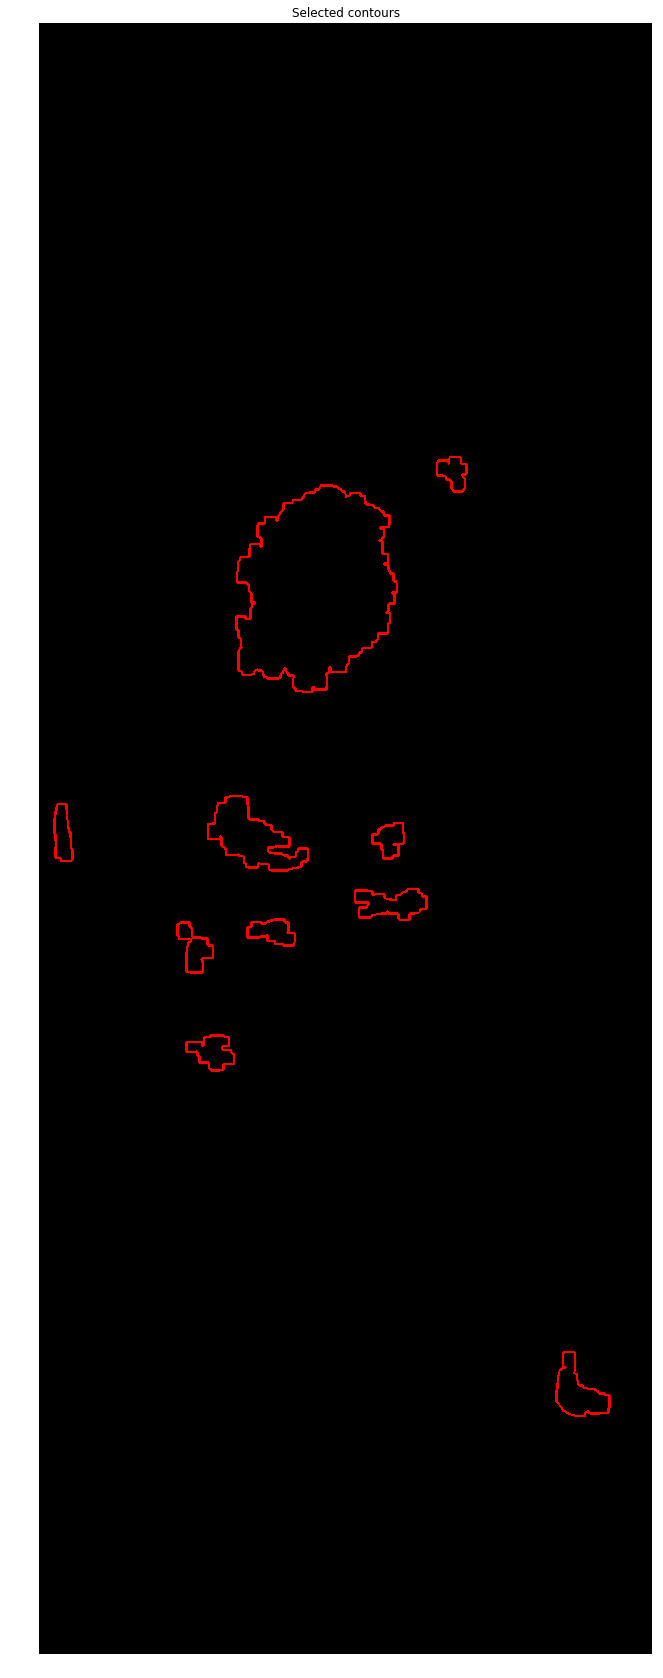

In [15]:
mm_shape = mm.image_data.shape

img_color2 = np.zeros((mm_shape[0], mm_shape[1], 3), dtype='uint8')

cv2.drawContours(img_color2, contours2, -1, (255,0,0), 3)
plt.figure(figsize=(30,30))
show_image_plt(img_color2,'Selected contours')

## Reading features of several images

`get_dataset_features` function can be used for feature extraction from whole dataset. Use `train` argument in order to get training or testing dataframe. By default data will be returned for training.

In [16]:
from immas import get_dataset_features

help(get_dataset_features)

Help on function get_dataset_features in module immas.features.get_features:

get_dataset_features(data, contour_max_number=10, train=True)
    Function returns list of features for all of the mammograms.
    
    Args:
        data ([MammogramImage]): list (iterable) of the mammograms from dataset.
        contour_max_number (int): maximum number of contours (without groundtruth) 
        to take into account, default is 10. In case you do not want to limit the number 
        of contours provide None as the parameter value.
        train (bool): if True, dataframe of features will be returned with correct class
        ids assigned to each candidate region, if False all class ids will be zero. Default
        value is True.
    
    Returns:
        pandas.DataFrame: feature of all images combined in one data table.



In [17]:
# let's create sample dataset of two images
path_image1 = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask1 = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_ground_truth1 = "../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle1 = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

path_image2 = "../dataset/images/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.tif"
path_mask2 = "../dataset/masks/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.png"
pectoral_muscle2 = "../dataset/pectoral_muscle_masks/20587690_f4b2d377f43ba0bd_MG_L_ML_ANON.tif"

mm1 = MammogramImage(path_image1, 
                     path_mask1, 
                     ground_truth_path=path_ground_truth1, 
                     pmuscle_mask_path=pectoral_muscle1,
                     load_data=False)
mm2 = MammogramImage(path_image2, 
                     path_mask2, 
                     pmuscle_mask_path=pectoral_muscle2,
                     load_data=False)
dataset = [mm1, mm2]

### Train data
This cell reads features of all images in the dataset,with no limitation on the number of extracted regions. The ourput data in training format.

In [18]:
dataset_features = get_dataset_features(dataset, contour_max_number=None)

/home/okozyn/Projects/immas/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


In [19]:
dataset_features

,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
0,840.852812,15244.0,3.690890,4130.168616,32564.786239,19025.671417,1.0,6.898285e+10,-1.0
1,469.781744,7421.5,2.366414,3136.179958,32942.014517,18901.707121,1.0,2.153003e+09,-1.0
2,503.740114,5976.0,3.379034,1768.552550,32598.760810,19036.268850,1.0,4.850209e+10,-1.0
3,373.455844,4293.0,2.585281,1660.554455,33611.502122,18996.723723,1.0,-1.212079e+11,-1.0
4,362.284271,3810.0,2.741348,1389.827363,32656.269057,18669.309304,1.0,3.615419e+09,-1.0
5,310.041630,3402.5,2.248185,1513.443137,32419.812658,18924.156407,1.0,8.411224e+10,-1.0
6,295.698484,3319.5,2.096118,1583.642007,32924.413395,18998.025002,1.0,-1.288015e+11,-1.0
7,287.798990,3053.0,2.158946,1414.115697,32762.653834,18944.126990,1.0,1.256461e+11,-1.0
8,274.870057,2666.5,2.254776,1182.600817,33212.127454,19213.513195,1.0,-3.230391e+11,-1.0
9,267.798990,2604.0,2.191629,1188.157342,32850.051170,18623.262218,1.0,-1.448441e+11,-1.0


### ROI classes
Depending on `class_id` value we can select different regions of interest, 1 is for masses, -1 is for false positives.

In [21]:
dataset_features.loc[dataset_features['class_id'] == 1]

,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
72,1743.599186,120333.5,2.010467,59853.513050,32640.330093,18904.684220,1.0,6.647140e+08,1.0
73,485.043720,11603.0,1.613547,7190.989862,32559.567073,18845.800389,1.0,1.638218e+10,1.0


### Our dataset features can be easily saved into `.csv` file for futher usage

In [22]:
dataset_features.to_csv("./sample-features-train.csv")

### Test data
This example will extract regions of interest and their features in the format suitable for testing. 

In [23]:
dataset_features_test = get_dataset_features(dataset, contour_max_number=None, train=False)

dataset_features_test

/home/okozyn/Projects/immas/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars
  M1 = float(M1K/W1K)


,perimeter,area,circularity,ac,mean_intensity,standard_deviation,smoothness,skewness,class_id
0,1764.960458,99652.0,2.487563,40060.092060,32605.021502,18886.513883,1.0,1.697612e+10,0.0
1,840.852812,15244.0,3.690890,4130.168616,32564.786239,19025.671417,1.0,6.898285e+10,0.0
2,469.781744,7421.5,2.366414,3136.179958,32942.014517,18901.707121,1.0,2.153003e+09,0.0
3,503.740114,5976.0,3.379034,1768.552550,32598.760810,19036.268850,1.0,4.850209e+10,0.0
4,373.455844,4293.0,2.585281,1660.554455,33611.502122,18996.723723,1.0,-1.212079e+11,0.0
5,362.284271,3810.0,2.741348,1389.827363,32656.269057,18669.309304,1.0,3.615419e+09,0.0
6,310.041630,3402.5,2.248185,1513.443137,32419.812658,18924.156407,1.0,8.411224e+10,0.0
7,295.698484,3319.5,2.096118,1583.642007,32924.413395,18998.025002,1.0,-1.288015e+11,0.0
8,287.798990,3053.0,2.158946,1414.115697,32762.653834,18944.126990,1.0,1.256461e+11,0.0
9,271.698484,2798.5,2.099130,1333.171606,32675.187649,18763.082127,1.0,1.755368e+11,0.0


### Our dataset features can be easily saved into `.csv` file for futher usage

In [24]:
dataset_features.to_csv("./sample-features-test.csv")